In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cov(x1,x2):
    return np.exp(-(x1-x2)**2/2)

def crosscov(x1,x2):
    return (x2-x1)*np.exp(-(x1-x2)**2/2)

def gradcov(x1,x2):
    return ((x2-x1)**2-1)*np.exp(-(x1-x2)**2/2)

def covmat(X1,X2):
    C = np.zeros([len(X1),len(X2)])
    for i,x1item in enumerate(X1):
        for j,x2item in enumerate(X2):
            x1 = x1item[0]
            x2 = x2item[0]
            if (x1item[1]==0) and (x2item[1]==0): fn = cov
            if (x1item[1]!=x2item[1]): fn = crosscov
            if (x1item[1]==1) and (x2item[1]==1): fn = gradcov
            C[i,j] = fn(x1item[0],x2item[0])
    return C



[[1.         0.13533528]
 [0.13533528 1.        ]]


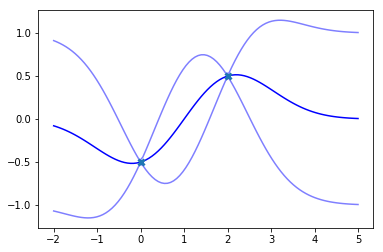

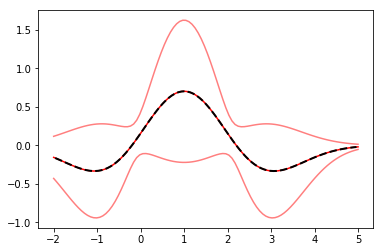

In [88]:
X = np.array([[0,0],[2,0]])
Xgrad = np.array([[1,1]])
C = covmat(X,X)
y = np.array([-.5,.5])
testx = np.linspace(-2,5,100)[:,None]
testx = np.c_[testx,np.zeros(len(testx))]
postmean = covmat(testx,X)@np.linalg.inv(C)@y
postvar = 1-covmat(testx,X)@np.linalg.inv(C)@covmat(X,testx)
plt.plot(testx[:,0],postmean,'b-')
plt.plot(testx[:,0],postmean-np.sqrt(np.diag(postvar)),'b-',alpha=0.5);
plt.plot(testx[:,0],postmean+np.sqrt(np.diag(postvar)),'b-',alpha=0.5);
plt.plot(X[:,0],y,'x',mew=3)
plt.figure()
testx = np.linspace(-2,5,100)[:,None]
testx = np.c_[testx,np.ones(len(testx))]
cstar = covmat(testx,X)
step = testx[1,0]-testx[0,0]

print(C)
gradmean = cstar@np.linalg.inv(C)@y
gradvar = 0-covmat(testx,X)@np.linalg.inv(C)@covmat(X,testx)
plt.plot(testx[:,0],gradmean,'r-')
plt.plot(testx[:,0],gradmean-np.sqrt(np.diag(gradvar)),'r-',alpha=0.5);
plt.plot(testx[:,0],gradmean+np.sqrt(np.diag(gradvar)),'r-',alpha=0.5);
plt.plot(testx[1:,0]-(step/2),np.diff(postmean)/step,'--k',lw=2)

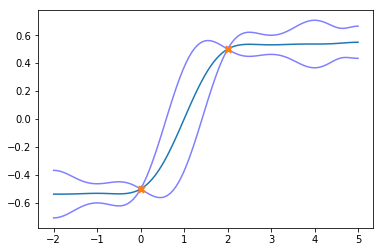

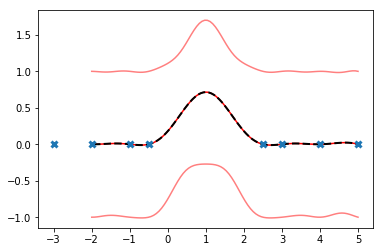

In [98]:
X = np.array([[0,0],[2,0],[2.5,1],[3,1],[4,1],[5,1],[-.5,1],[-1,1],[-2,1],[-3,1]])
y = np.array([-.5,.5,0,0,0,0,0,0,0,0])
Xgrad = np.array([[1,1]])
C = covmat(X,X)

testx = np.linspace(-2,5,100)[:,None]
testx = np.c_[testx,np.zeros(len(testx))]
postmean = covmat(testx,X)@np.linalg.inv(C)@y
postvar = 1-covmat(testx,X)@np.linalg.inv(C)@covmat(X,testx)
plt.plot(testx[:,0],postmean)
plt.plot(testx[:,0],postmean-np.sqrt(np.diag(postvar)),'b-',alpha=0.5);
plt.plot(testx[:,0],postmean+np.sqrt(np.diag(postvar)),'b-',alpha=0.5);
plt.plot(X[X[:,1]==0,0],y[X[:,1]==0],'x',mew=3)
plt.figure()
testx = np.linspace(-2,5,100)[:,None]
testx = np.c_[testx,np.ones(len(testx))]
cstar = covmat(testx,X)
step = testx[1,0]-testx[0,0]

gradmean = cstar@np.linalg.inv(C)@y
gradvar = 0-covmat(testx,X)@np.linalg.inv(C)@covmat(X,testx)
plt.plot(testx[:,0],gradmean,'r-')
plt.plot(testx[:,0],gradmean-np.sqrt(np.diag(gradvar)),'r-',alpha=0.5);
plt.plot(testx[:,0],gradmean+np.sqrt(np.diag(gradvar)),'r-',alpha=0.5);
plt.plot(testx[1:,0]-(step/2),np.diff(postmean)/step,'--k',lw=2)
plt.plot(X[X[:,1]==1,0],y[X[:,1]==1],'x',mew=3)